In [3]:
# 定期定額
import pandas as pd
import module_import
from src.quant_analysis.module_import import ETF_0050
df = ETF_0050()
df

[2024-09-02 10:15:57,474][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-09-02 10:15:57,559][log.log][INFO] Query execution time: 0.03408980369567871 seconds.


,Close
Date,
2022-08-12,113.208
2022-08-15,114.239
2022-08-16,114.426
2022-08-17,114.473
2022-08-18,113.724
...,...
2024-08-26,181.250
2024-08-27,180.450
2024-08-28,183.000


In [5]:
PMT=3000
start = "2023-01-01"
end = "2024-03-01"

In [7]:
dfm = df.resample("BME").last()
dfm = df.loc[start:end]

In [8]:
TC_list = []
for i in range(1, len(dfm)+1):
    TC = PMT*i
    TC_list.append(TC)
dfm["TC"] = TC_list
dfm

/tmp/ipykernel_10392/2614211906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["TC"] = TC_list


,Close,TC
Date,,
2023-01-03,103.790,3000
2023-01-04,103.555,6000
2023-01-05,104.305,9000
2023-01-06,104.774,12000
2023-01-09,108.522,15000
...,...,...
2024-02-23,143.019,813000
2024-02-26,143.218,816000
2024-02-27,142.621,819000


In [10]:
unit_list = [PMT/dfm['Close'].iloc[0]]
for i in dfm['Close'].iloc[1:]:
    unit = unit_list[-1] + PMT / i
    unit_list.append(unit)
dfm['unit'] = unit_list

preNAV_list = [0]
for i, j in enumerate(dfm["Close"].iloc[1:]):
    preNAV = dfm["unit"].iloc[i] * j
    preNAV_list.append(preNAV)
dfm["preNAV"] = preNAV_list

dfm

/tmp/ipykernel_10392/2364480720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['unit'] = unit_list
/tmp/ipykernel_10392/2364480720.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["preNAV"] = preNAV_list


,Close,TC,unit,preNAV
Date,,,,
2023-01-03,103.790,3000,28.904519,0.000000
2023-01-04,103.555,6000,57.874631,2993.207438
2023-01-05,104.305,9000,86.636436,6036.613412
2023-01-06,104.774,12000,115.269493,9077.245900
2023-01-09,108.522,15000,142.913658,12509.275961
...,...,...,...,...
2024-02-23,143.019,813000,6704.603386,955885.671659
2024-02-26,143.218,816000,6725.550474,960219.887733
2024-02-27,142.621,819000,6746.585244,959204.734100


In [11]:
dfm["total_return(%)"] = (dfm["preNAV"] / (dfm['TC'] - PMT) - 1)*100
dfm

/tmp/ipykernel_10392/3600151268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm["total_return(%)"] = (dfm["preNAV"] / (dfm['TC'] - PMT) - 1)*100


,Close,TC,unit,preNAV,total_return(%)
Date,,,,,
2023-01-03,103.790,3000,28.904519,0.000000,NaN
2023-01-04,103.555,6000,57.874631,2993.207438,-0.226419
2023-01-05,104.305,9000,86.636436,6036.613412,0.610224
2023-01-06,104.774,12000,115.269493,9077.245900,0.858288
2023-01-09,108.522,15000,142.913658,12509.275961,4.243966
...,...,...,...,...,...
2024-02-23,143.019,813000,6704.603386,955885.671659,18.010577
2024-02-26,143.218,816000,6725.550474,960219.887733,18.108227
2024-02-27,142.621,819000,6746.585244,959204.734100,17.549600


<Axes: xlabel='Date'>

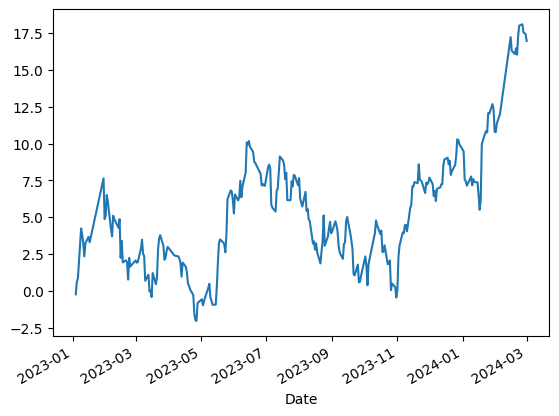

In [13]:
dfm['total_return(%)'].plot()

<Axes: xlabel='Date'>

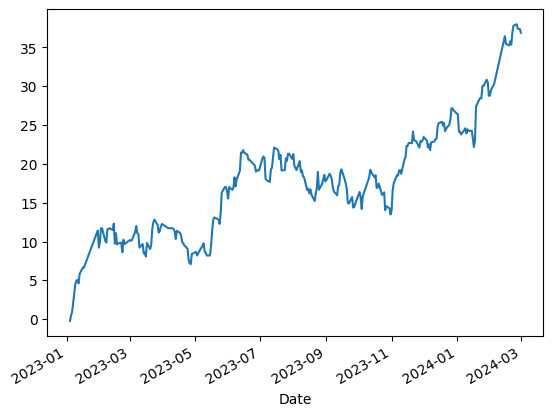

In [14]:
import numpy as np
lr = np.log(dfm['Close']).diff(1)
tr = np.exp(np.cumsum(lr)) - 1
tr = tr*100
tr.plot()

In [15]:
print(dfm['total_return(%)'].iloc[-1])
print(tr.iloc[-1])

16.97127664530591
36.88601984776949
